In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/metazoa/correlated_rates/cherry_only/LG_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         14.8117 (13.8822, 15.7838) (13.8780, 15.7752)  1.8972 (Jnode 106)\n',
 't_n56         14.7114 (13.8032, 15.6483) (13.7877, 15.6282)  1.8405 (Jnode 105)\n',
 't_n57         13.1579 (12.3902, 13.9550) (12.3698, 13.9296)  1.5597 (Jnode 104)\n',
 't_n58         11.0589 (10.4777, 11.6709) (10.4610, 11.6520)  1.1910 (Jnode 103)\n',
 't_n59         10.4949 ( 9.9436, 11.0710) ( 9.9298, 11.0493)  1.1195 (Jnode 102)\n',
 't_n60          9.8228 ( 9.3073, 10.3605) ( 9.2947, 10.3433)  1.0487 (Jnode 101)\n',
 't_n61          8.8873 ( 8.4122,  9.3802) ( 8.4056,  9.3707)  0.9651 (Jnode 100)\n',
 't_n62          4.5045 ( 3.9676,  4.9659) ( 3.9958,  4.9850)  0.9891 (Jnode 99)\n',
 't_n63          6.4531 ( 6.1009,  6.8257) ( 6.0849,  6.8074)  0.7225 (Jnode 98)\n',
 't_n64          4.7468 ( 4.4514,  5.0197) ( 4.4578,  5.0231)  0.5653 (Jnode 97)\n',
 't_n65          4.0766 ( 3.8071,  4.3237) ( 3.8139,  4.3267)  0.5128 (Jnode 96)\n',
 't_n66          3.1552 ( 2.9270,  3.3542) ( 2.9241,  3.35

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
posterior_mean_mu_iqtree

[0.0172, 0.0201, 0.0172, 0.0139, 0.0159, 0.013, 0.0167, 0.0167, 0.0179, 0.023]

In [6]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [7]:
posterior_mean_iqtree

[14.8117,
 14.7114,
 13.1579,
 11.0589,
 10.4949,
 9.8228,
 8.8873,
 4.5045,
 6.4531,
 4.7468,
 4.0766,
 3.1552,
 2.1717,
 1.4798,
 0.6362,
 4.8084,
 9.9083,
 8.2483,
 8.8261,
 6.3902,
 5.4595,
 5.36,
 9.9417,
 9.2289,
 8.7576,
 8.1385,
 7.3734,
 6.9961,
 6.0182,
 5.3633,
 4.7739,
 3.6266,
 3.1194,
 6.1687,
 4.7997,
 9.5877,
 2.7172,
 9.1794,
 8.4084,
 7.3283,
 6.6006,
 4.8023,
 5.2294,
 7.0783,
 6.4674,
 5.5236,
 4.8052,
 6.1483,
 11.5997,
 8.7039,
 5.4564,
 4.882,
 10.4612]

In [8]:
lower_ci_iqtree

[5.7838,
 5.6483,
 3.955,
 1.6709,
 0.9436,
 0.3073,
 0.4122,
 0.9676,
 0.1009,
 0.4514,
 0.8071,
 0.927,
 0.0123,
 0.3673,
 0.6153,
 0.5276,
 0.388,
 0.7563,
 0.3583,
 0.9564,
 0.0584,
 0.0626,
 0.4326,
 0.7608,
 0.3105,
 0.7274,
 0.0117,
 0.6509,
 0.732,
 0.1239,
 0.573,
 0.5097,
 0.0558,
 0.8439,
 0.5375,
 0.0969,
 0.2333,
 0.7088,
 0.9745,
 0.94,
 0.2426,
 0.5255,
 0.889,
 0.702,
 0.1066,
 0.1698,
 0.522,
 0.6852,
 2.3209,
 0.0502,
 0.8101,
 0.3823,
 0.5413]

In [9]:
upper_ci_iqtree

[13.878,
 13.7877,
 12.3698,
 10.461,
 11.071,
 10.3605,
 9.3802,
 4.9659,
 6.8257,
 5.0197,
 4.3237,
 3.3542,
 2.3267,
 1.6003,
 0.6864,
 5.1484,
 10.4523,
 8.7675,
 9.3284,
 6.8563,
 5.9068,
 5.786,
 10.4721,
 9.7228,
 9.2261,
 8.5732,
 7.7631,
 7.3645,
 6.331,
 5.6353,
 5.0089,
 3.7964,
 3.266,
 6.525,
 5.1245,
 10.1006,
 3.2843,
 9.6668,
 8.8506,
 7.7117,
 6.9414,
 5.0945,
 5.4858,
 7.4693,
 6.8486,
 5.8982,
 5.1285,
 6.6144,
 10.9023,
 9.3627,
 6.0608,
 5.4992,
 11.4278]

In [10]:
file_LG = open("LG_cherry_only_codeml_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

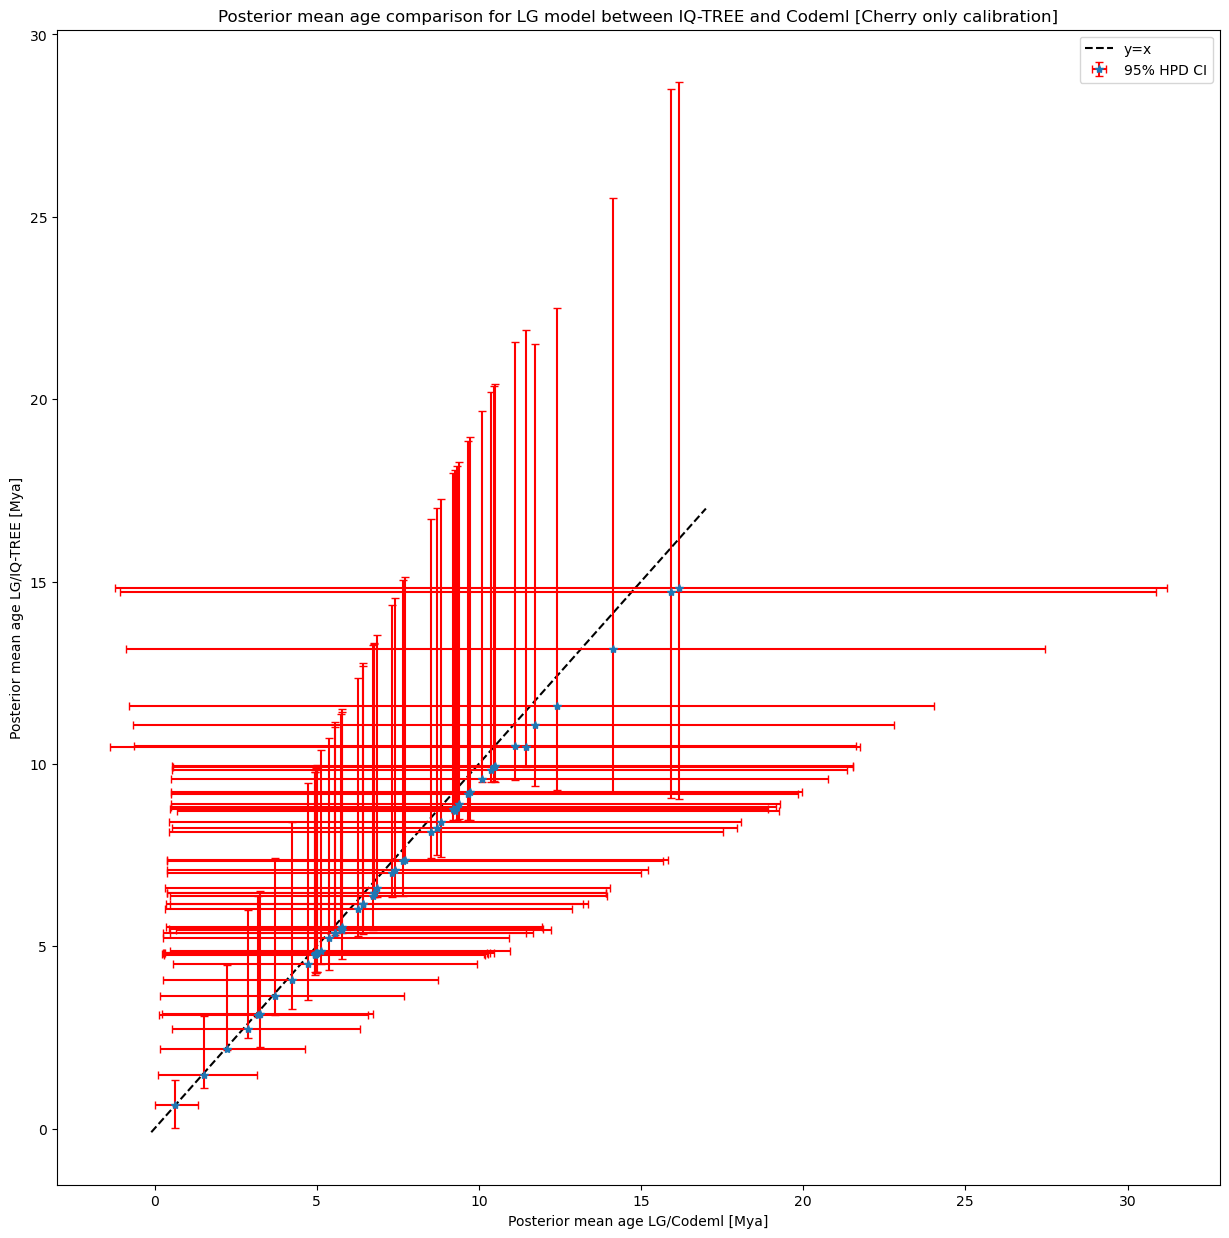

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG/Codeml [Mya]')
ax.set_ylabel('Posterior mean age LG/IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison for LG model between IQ-TREE and Codeml [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co_iqtree_codeml.png')

In [12]:
posterior_mean_baseml

[16.1661,
 15.9364,
 14.1365,
 11.7319,
 11.1144,
 10.3859,
 9.378,
 4.7392,
 6.757,
 4.9397,
 4.2313,
 3.2608,
 2.2346,
 1.518,
 0.6418,
 5.0166,
 10.48,
 8.7007,
 9.3145,
 6.7245,
 5.7423,
 5.5745,
 10.4922,
 9.7191,
 9.2076,
 8.54,
 7.7168,
 7.3133,
 6.2691,
 5.5732,
 4.9476,
 3.7277,
 3.1905,
 6.4335,
 4.9879,
 10.1076,
 2.8951,
 9.6643,
 8.8278,
 7.6583,
 6.8737,
 4.9901,
 5.3893,
 7.413,
 6.7699,
 5.7809,
 5.0105,
 6.4424,
 12.4045,
 9.265,
 5.7887,
 5.1418,
 11.4537]

In [13]:
posterior_mean_iqtree

[14.8117,
 14.7114,
 13.1579,
 11.0589,
 10.4949,
 9.8228,
 8.8873,
 4.5045,
 6.4531,
 4.7468,
 4.0766,
 3.1552,
 2.1717,
 1.4798,
 0.6362,
 4.8084,
 9.9083,
 8.2483,
 8.8261,
 6.3902,
 5.4595,
 5.36,
 9.9417,
 9.2289,
 8.7576,
 8.1385,
 7.3734,
 6.9961,
 6.0182,
 5.3633,
 4.7739,
 3.6266,
 3.1194,
 6.1687,
 4.7997,
 9.5877,
 2.7172,
 9.1794,
 8.4084,
 7.3283,
 6.6006,
 4.8023,
 5.2294,
 7.0783,
 6.4674,
 5.5236,
 4.8052,
 6.1483,
 11.5997,
 8.7039,
 5.4564,
 4.882,
 10.4612]

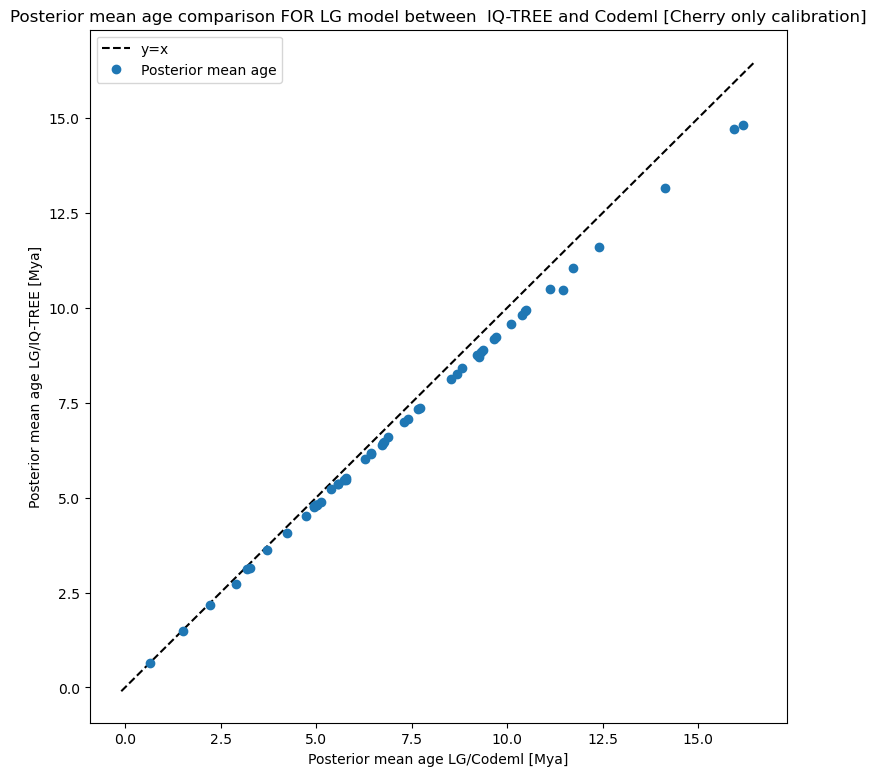

In [14]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG/Codeml [Mya]')
ax.set_ylabel('Posterior mean age LG/IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison FOR LG model between  IQ-TREE and Codeml [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_iqtree_codeml_scatter.png')

In [17]:
posterior_mean_baseml

[16.1661,
 15.9364,
 14.1365,
 11.7319,
 11.1144,
 10.3859,
 9.378,
 4.7392,
 6.757,
 4.9397,
 4.2313,
 3.2608,
 2.2346,
 1.518,
 0.6418,
 5.0166,
 10.48,
 8.7007,
 9.3145,
 6.7245,
 5.7423,
 5.5745,
 10.4922,
 9.7191,
 9.2076,
 8.54,
 7.7168,
 7.3133,
 6.2691,
 5.5732,
 4.9476,
 3.7277,
 3.1905,
 6.4335,
 4.9879,
 10.1076,
 2.8951,
 9.6643,
 8.8278,
 7.6583,
 6.8737,
 4.9901,
 5.3893,
 7.413,
 6.7699,
 5.7809,
 5.0105,
 6.4424,
 12.4045,
 9.265,
 5.7887,
 5.1418,
 11.4537]

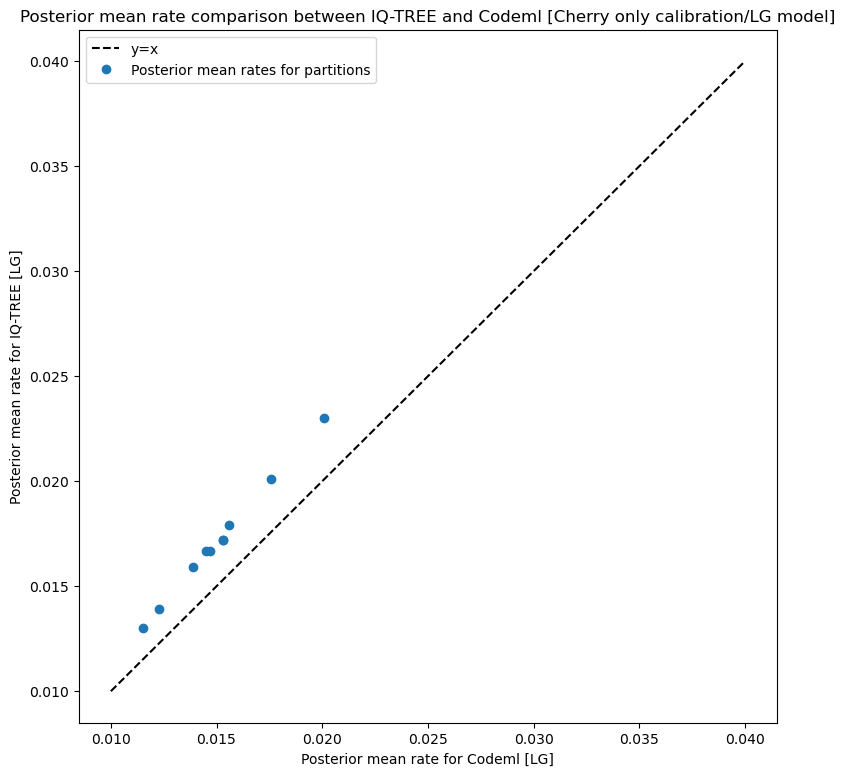

In [16]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate for Codeml [LG]')
ax.set_ylabel('Posterior mean rate for IQ-TREE [LG]')
ax.set_title('Posterior mean rate comparison between IQ-TREE and Codeml [Cherry only calibration/LG model]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_iqtree_codeml_co_scatter.png')